# **Laboratorijska vježba 7**: Zadaci za samostalni rad

## **Predviđanje udomljavanja životinja**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži podatke o životinjama iz skloništa za životinje. Cilj je izgraditi i trenirati algoritam strojnog učenja koji će predvidjeti hoće li životinja iz skloništa biti udomljena ili ne. Skup podataka sadrži sljedeće značajke:

* animal_type - tip životinje
* intake_year - godina primanja u sklonište
* intake_condition - stanje životinje pri primanju u sklonište
* intake_number - broj slučajeva kada je ista životinja dovedena u sklonište
* intake_type - tip donošenja u sklonište (primjerice, zalutala životinja, dobrovoljna predaja vlasnika,...)
* sex_upon_intake - spol životinje i informacija o kastriranju pri primanju
* age_upon_intake - dob životinje pri primanju
* time_in_shelter_days - broj dana koja je životinja provela u skloništu
* sex_upon_outcome - spol životinje i informacija o kastriranju pri donošenju odluke o udomljavanju
* age_upon_outcome - dob životinje pri donošenju odluke o udomljavanju
* outcome_type - odluka o udomljavanju

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sn
%matplotlib inline

data_folder = './Data/'

In [ ]:
data = pd.read_csv('Data/aac_intakes_outcomes.csv')
data.head(5)

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


## **Zadatak 1: Transformacija značajki**

Uredite skup podataka na način da rukujete s nedostajućim vrijednostima. Provjerite ima li takvih vrijednosti te ih uklonite ili nadomjestite prikladnim vrijednostima.



In [ ]:
df = pd.DataFrame(data)
#print(df)
print(len(df)) #79672


#provjera nedostajucih vrijednosti
not_null_val = df.notnull()
missing_val = df.isnull()
print(missing_val)


#uklanjanje nedostajucih v.
clean_df = df.dropna(axis = "index", how = "any") # Remove rows with empty values
print(len(clean_df)) #36348

cols = [       #stupci koje cemo promatrati
    "animal_type",
    "intake_year",
    "intake_condition",
    "intake_number",
    "intake_type",
    "sex_upon_intake",
    "age_upon_intake",
    "time_in_shelter_days",
    "sex_upon_outcome",
    "age_upon_outcome",
    "outcome_type",
]

data = data[cols]
data.dropna(inplace=True) #jer nisu svi prazni bili obrisani
data.isna().sum()

79672
       age_upon_outcome  animal_id_outcome  date_of_birth  outcome_subtype  \
0                 False              False          False             True   
1                 False              False          False             True   
2                 False              False          False             True   
3                 False              False          False            False   
4                 False              False          False             True   
...                 ...                ...            ...              ...   
79667             False              False          False            False   
79668             False              False          False            False   
79669             False              False          False            False   
79670             False              False          False             True   
79671             False              False          False            False   

       outcome_type  sex_upon_outcome  age_upon_outcome_(

<ipython-input-4-85c1d2a51f03>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True) #jer nisu svi prazni bili obrisani


animal_type             0
intake_year             0
intake_condition        0
intake_number           0
intake_type             0
sex_upon_intake         0
age_upon_intake         0
time_in_shelter_days    0
sex_upon_outcome        0
age_upon_outcome        0
outcome_type            0
dtype: int64

Prebacite kategoričke i ordinalne značajke u numeričke pomoću *one-hot encoding* tehnike.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# data.columns
# data.dtypes

ohe = OneHotEncoder()

#Kategoričke
transformed = ohe.fit_transform(data[['outcome_type']])
data[ohe.categories_[0]] = transformed.toarray()

transformed = ohe.fit_transform(data[['animal_type']]) #tip zivotinje
data[ohe.categories_[0]] = transformed.toarray()

transformed = ohe.fit_transform(data[['intake_type']]) #tip donosenja u skladiste
data[ohe.categories_[0]] = transformed.toarray()

transformed = ohe.fit_transform(data[["intake_condition"]]) #stanje zivotinje pri primanju u skloniste
data[ohe.categories_[0]] = transformed.toarray()

transformed = ohe.fit_transform(data[['sex_upon_intake']]) #spol i info o kastriranju-skloniste
data[ohe.categories_[0]] = transformed.toarray()

transformed = ohe.fit_transform(data[['sex_upon_outcome']]) #spol i info o kastriranju-udomlavanje
data[ohe.categories_[0]] = transformed.toarray()

#intake_type
#sex_upon_outcome
data


,animal_type,intake_year,intake_condition,intake_number,intake_type,sex_upon_intake,age_upon_intake,time_in_shelter_days,sex_upon_outcome,age_upon_outcome,...,Injured,Normal,Nursing,Pregnant,Sick,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown
0,Dog,2017,Normal,1.0,Stray,Neutered Male,10 years,0.588194,Neutered Male,10 years,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Dog,2014,Normal,2.0,Public Assist,Neutered Male,7 years,1.259722,Neutered Male,7 years,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Dog,2014,Normal,3.0,Public Assist,Neutered Male,6 years,1.113889,Neutered Male,6 years,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Dog,2014,Normal,1.0,Owner Surrender,Neutered Male,10 years,4.970139,Neutered Male,10 years,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Dog,2013,Injured,1.0,Public Assist,Neutered Male,16 years,0.119444,Neutered Male,16 years,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79667,Cat,2018,Normal,1.0,Stray,Unknown,2 weeks,0.077083,Unknown,2 weeks,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79668,Other,2018,Normal,1.0,Wildlife,Unknown,2 years,0.053472,Unknown,2 years,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79669,Other,2018,Normal,1.0,Wildlife,Unknown,1 year,0.047917,Unknown,1 year,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79670,Dog,2018,Normal,1.0,Stray,Intact Male,5 months,1.762500,Intact Male,10 months,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
categ_columns = [  # stari kategoricki stupci
    "animal_type",
    "intake_condition",
    "intake_type",
    "sex_upon_intake",
    "sex_upon_outcome",

]
for category in categ_columns:
  data = data.drop([category], axis = 1) #izbaci početne kategoričke stupce
data

,intake_year,intake_number,age_upon_intake,time_in_shelter_days,age_upon_outcome,outcome_type,Adoption,Died,Disposal,Euthanasia,...,Injured,Normal,Nursing,Pregnant,Sick,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown
0,2017,1.0,10 years,0.588194,10 years,Return to Owner,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2014,2.0,7 years,1.259722,7 years,Return to Owner,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2014,3.0,6 years,1.113889,6 years,Return to Owner,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2014,1.0,10 years,4.970139,10 years,Transfer,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2013,1.0,16 years,0.119444,16 years,Return to Owner,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79667,2018,1.0,2 weeks,0.077083,2 weeks,Transfer,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79668,2018,1.0,2 years,0.053472,2 years,Euthanasia,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79669,2018,1.0,1 year,0.047917,1 year,Euthanasia,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79670,2018,1.0,5 months,1.762500,10 months,Return to Owner,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#smanjivanje broja primjeraka
data = data.iloc[:6000, :]
data

,intake_year,intake_number,age_upon_intake,time_in_shelter_days,age_upon_outcome,outcome_type,Adoption,Died,Disposal,Euthanasia,...,Injured,Normal,Nursing,Pregnant,Sick,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown
0,2017,1.0,10 years,0.588194,10 years,Return to Owner,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2014,2.0,7 years,1.259722,7 years,Return to Owner,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2014,3.0,6 years,1.113889,6 years,Return to Owner,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2014,1.0,10 years,4.970139,10 years,Transfer,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2013,1.0,16 years,0.119444,16 years,Return to Owner,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2014,1.0,7 years,7.168056,7 years,Return to Owner,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5996,2013,2.0,7 years,103.179167,7 years,Adoption,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5997,2013,1.0,1 year,36.186806,1 year,Transfer,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5998,2013,1.0,2 years,5.186806,2 years,Adoption,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#za y dobiti vektor br. vrijednosti koje označavaju odluku o udomljenju
data["outcome_type"] = le.fit_transform(data["outcome_type"])
y = data["outcome_type"] #izlazna varijabla
y = y.values
data = data.drop(["outcome_type"], axis=1)  #Da u data imamo smao ulazne velicine

age_cols = ['age_upon_intake', 'age_upon_outcome'] #izbaciti im rijeci, ostaviti samo br.

for col in age_cols:
    data[col] = data[col].replace(" years", "", regex=True)
    data[col][data[col].str.contains(" ") == True] = 1
    data[col] = data[col].astype(int)

data

<ipython-input-8-b53edcddd377>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["outcome_type"] = le.fit_transform(data["outcome_type"])
<ipython-input-8-b53edcddd377>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col].str.contains(" ") == True] = 1
<ipython-input-8-b53edcddd377>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col].str.con

,intake_year,intake_number,age_upon_intake,time_in_shelter_days,age_upon_outcome,Adoption,Died,Disposal,Euthanasia,Missing,...,Injured,Normal,Nursing,Pregnant,Sick,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown
0,2017,1.0,10,0.588194,10,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2014,2.0,7,1.259722,7,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2014,3.0,6,1.113889,6,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2014,1.0,10,4.970139,10,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2013,1.0,16,0.119444,16,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2014,1.0,7,7.168056,7,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5996,2013,2.0,7,103.179167,7,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5997,2013,1.0,1,36.186806,1,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5998,2013,1.0,2,5.186806,2,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Normalizirajte vrijednosti svih značajki u interval $[0,1]$. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#data = data.astype(float)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
val_list = []
for col in data.columns:
    val_list.append(col)
    
data_scaled = pd.DataFrame(scaled, columns=val_list)
data_scaled

,intake_year,intake_number,age_upon_intake,time_in_shelter_days,age_upon_outcome,Adoption,Died,Disposal,Euthanasia,Missing,...,Injured,Normal,Nursing,Pregnant,Sick,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown
0,0.8,0.000000,0.50,0.000366,0.50,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.2,0.142857,0.35,0.000784,0.35,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.2,0.285714,0.30,0.000693,0.30,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.2,0.000000,0.50,0.003094,0.50,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.000000,0.80,0.000074,0.80,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.2,0.000000,0.35,0.004462,0.35,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5996,0.0,0.142857,0.35,0.064238,0.35,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5997,0.0,0.000000,0.05,0.022529,0.05,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5998,0.0,0.000000,0.10,0.003229,0.10,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## **Zadatak 2: Odabir modela**

Za uređeni skup podataka provedite odabir modela. Prvo podijelite skup podataka na podskupove za treniranje i testiranje u omjeru 80:20. Zatim definirajte mrežu hiperparametara za četiri klasifikatora: DT, SVM, $k$-NN i logističku regresiju.

In [ ]:
from sklearn.model_selection import train_test_split

X = data_scaled[val_list]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# SVC parameters
kernel = ("linear", "rbf")
c = [1, 5, 15, 50]

# KNN parameters
n_neighbors = [2, 4, 9, 15, 29]
weights = ("uniform", "distance")
algorithm = ("auto", "ball_tree", "kd_tree", "brute")

# DT parameters
criterion = ("gini", "entropy", "log_loss")
splitter = ("best", "random")
max_depth = [5, 10, 15, 30, 50]

# LR parameters
penalty = (None, "l1", "l2", "elasticnet")
fit_intercept = (True, False)


Na podskupu za treniranje isprobajte sve kombinacije hiperparametara te usporedite najbolje kombinacije za svaki klasifikator na podskupu za testiranje. Odaberite prikladnu mjeru za usporedbu performansi. Možete koristiti klasu GridSearchCV te podijeliti podskup za trening postupkom unakrsne provjere $5$ preklopa. 

In [ ]:
parameters = {"kernel": kernel, "C": c}
svc = SVC()

svc_grid = GridSearchCV(svc, parameters, scoring="accuracy", cv=5)
svc_grid.fit(X_train, y_train)
print("SVC: ")
print("Najbolji parametri: ", svc_grid.best_params_)
print("Točnost na testnim podacima: ", accuracy_score(svc_grid.predict(X_test), y_test))

In [ ]:
parameters = {"n_neighbors": n_neighbors, "weights": weights, "algorithm": algorithm}
knn = KNeighborsClassifier()

knn_grid = GridSearchCV(knn, parameters, scoring="accuracy", cv=5)
knn_grid.fit(X_train, y_train)
print("KNN:")
print("Najbolji parametri", knn_grid.best_params_)
print("Tocnost: ", accuracy_score(knn_grid.predict(X_test), y_test))

KNN:
Najbolji parametri {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}
Tocnost:  0.9958333333333333


In [ ]:
parameters = {
    "criterion": criterion,
    "splitter": splitter,
    "max_depth": max_depth,
}
dt = DecisionTreeClassifier()

dt_grid = GridSearchCV(dt, parameters, scoring="accuracy", cv=5)
dt_grid.fit(X_train, y_train)
print("DT:")
print("Najbolji parametri", dt_grid.best_params_)
print("Tocnost: ", accuracy_score(dt_grid.predict(X_test), y_test))

DT:
Najbolji parametri {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}
Tocnost:  1.0


In [ ]:
parameters = {
    "penalty": penalty,
   "fit_intercept": fit_intercept, 
}
lr = LogisticRegression()

lr_grid = GridSearchCV(lr, parameters, scoring="accuracy", cv=5)
lr_grid.fit(X_train, y_train)
print("LR:")
print(lr_grid.best_params_)
print(lr_grid.score(X_test, y_test))

LR:
{'fit_intercept': True, 'penalty': None}
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Prokomentirajte dobivene rezultate. Koji klasifikator ima najbolje performanse?

Za random_state:25

*   Za SVC je dobivena točnost 100% te za decision tree i logistic regresion (fit_itercept:true, penalty:None).
*   Za KNN 99.75%.

Za random_state:52

*   SVC, DT, LG - 1.0
*   KNN 0.9991666666666666

Za 82:


* SvC nije pokrenut, Ostali su 1.0:
DT {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
*  KNN je 0.9958333333333333 {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}










## **Zadatak 3: Odabir značajki - filtri**

Podijelite uređeni skup podataka na podskupove za treniranje i testiranje u omjeru 80:20 (koristite isto stanje nasumičnosti kao i u Zadatku 2).

In [ ]:
# Odabir značajki (engl. feature selection) važan je postupak predobrade skupa podataka kojim se ostvaruje smanjenje dimenzionalnosti problema klasifikacije te poboljšava izvedba raznih klasifikatora.

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=25)

Pomoću proizvoljnog filtra provedite odabir značajki za promatrani skup podataka. Rangirajte sve značajki na temelju vrijednosti mjere unutar filtra te iscrtajte stupčasti dijagram tih vrijednosti. 

Odaabrane značajke: 
['Adoption' 'Return to Owner']


<BarContainer object of 35 artists>

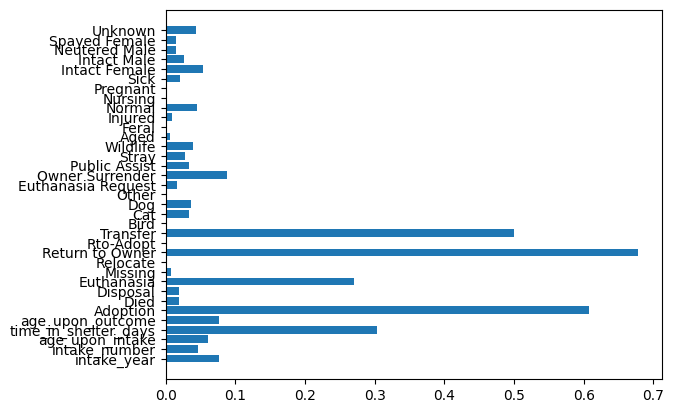

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

skb = SelectKBest(mutual_info_classif, k=2)
X_new = skb.fit_transform(X, y)

print("Odaabrane značajke: ")
print(skb.get_feature_names_out())
scores = skb.scores_

dt = DecisionTreeClassifier(criterion="gini", max_depth=10, splitter="best").fit(
    X_new, y
)

val_list = []
for col in X.columns:
    val_list.append(col)
plt.barh(val_list, scores)

Odaberite $K$ najbolje rangiranih značajki te trenirajte klasifikatore na podskupu za treniranje koristeći odabrane značajke. Možete koristiti najbolje klasifikatore iz Zadatka 2. Samostalno odaberite prikladnu vrijednost za $K$. Usporedite performanse ovih klasifikatora na podskupu za testiranje prije i nakon odabira značajki.  

In [ ]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=10, splitter="best").fit(
    X_train, y_train
)
print("Prije FS: ", accuracy_score(y_test, dt.predict(X_test)))


skb = SelectKBest(mutual_info_classif, k=7)  #7 najboljih znacajki

X_new = skb.fit_transform(X_train, y_train)
X_test_new = skb.transform(X_test)

print("Odabrane značajke: ")
print(skb.get_feature_names_out())



dt = DecisionTreeClassifier(criterion="gini", max_depth=10, splitter="best").fit(
    X_new, y_train
)
print("Nakon FS: ", accuracy_score(y_test, dt.predict(X_test_new)))

Prije FS:  1.0
Odabrane značajke: 
['intake_year' 'time_in_shelter_days' 'Adoption' 'Euthanasia'
 'Return to Owner' 'Transfer' 'Owner Surrender']
Nakon FS:  0.9983333333333333


________________________________________________
Nakon primjene filtra smanjena je tocnost za DT na 0.99833
________________________________________________



## **Zadatak 4: Odabir značajki - omotači**


Podijelite uređeni skup podataka na podskupove za treniranje i testiranje u omjeru 80:20 (koristite isto stanje nasumičnosti kao i u Zadatku 2). Zatim dodatno podijelite podskup za treniranje na podskupove za treniranje i vrednovanje u omjeru 65:35. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [ ]:
X_train_1, X_val, y_train_1, y_val = train_test_split( X_train, y_train, test_size=0.35, random_state=25)

Pomoću omotača SFS provedite odabir značajki za promatrani skup podataka. Isprobajte nekoliko različitih vrijednosti za konačan broj značajki, vodeći se performansama klasifikatora. Možete koristiti najbolji klasifikator iz Zadatka 2 za vrednovanje podskupova značajki. Napomena: klasifikator trenirajte na podskupu za trening, a podskupove značajki koje stvara SFS vrednujte na podskupu za vrednovanje.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

dt = DecisionTreeClassifier(criterion="gini", max_depth=10, splitter="best").fit( X_train, y_train )

sfs = SequentialFeatureSelector(
    dt,
    n_features_to_select=16,
    direction="forward",
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
)
sfs.fit(X_val, y_val)
np.arange(X.shape[1])[sfs.support_]  # indeksi odabranih parametara

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16])

Za n_features_to_select=16 **array**([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16])

Za 5 **array**([ 5,  6,  8, 11, 12])

Najbolje klasifikatore iz Zadatka 2 trenirajte na objedinjenom podskupu za treniranje i vrednovanje, koristeći odabrane značajke iz ovog zadatka. Usporedite performanse ovih klasifikatora na podskupu za testiranje prije i nakon odabira značajki.

In [ ]:
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
dt.fit(X_train_sfs, y_train)
y_pred_sfs = dt.predict(X_test_sfs)
sfs_score = accuracy_score(y_test, y_pred_sfs)

dt = DecisionTreeClassifier(criterion="gini", max_depth=10, splitter="best")
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score = accuracy_score(y_test, y_pred)

print("Sa sfs-om", sfs_score)
print("Bez sfs-a", score)

Sa sfs-om 1.0
Bez sfs-a 1.0


S 16 =>

Sa sfs-om 1.0

Bez sfs-a 1.0
_______________________________

S 5 = >

Sa sfs-om 0.9983333333333333

Bez sfs-a 1.0

## **Zadatak 5: Preuzorkovanje**

Podijelite uređeni skup podataka na podskupove za treniranje i testiranje u omjeru 80:20 (koristite isto stanje nasumičnosti kao i u Zadatku 2).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=25 )

Pomoću metode nasumičnog preuzorkovanja provedite preuzorkovanje podskupa za treniranje.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy="minority")
X_new, y_new = oversample.fit_resample(X_train, y_train)

Najbolje klasifikatore iz Zadatka 2 trenirajte na preuzorkovanom podskupu za treniranje. Usporedite performanse ovih klasifikatora na podskupu za testiranje prije i nakon preuzorkovanja. 

In [ ]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=10, splitter="best").fit(
    X_train, y_train
)
y_pred = dt.predict(X_test)
print("Bez metode nasumicnog preuzorkovanja", accuracy_score(y_test, y_pred))

dt = DecisionTreeClassifier(criterion="gini", max_depth=10, splitter="best").fit(
    X_new, y_new
)
y_pred_post = dt.predict(X_test)
print("Metoda nasumicnog preuzorkovanja", accuracy_score(y_test, y_pred_post))

Bez metode nasumicnog preuzorkovanja 1.0
Metoda nasumicnog preuzorkovanja 1.0
